In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read all file ( maison + appartement)
df = pd.read_csv("../../data/immo69-ventes.csv",delimiter=';',header=0,encoding="UTF-8",low_memory=False)
print (df.shape)
# display(df.head(20))
# keep only flats
print (df.typedebien.unique())
print (df.info())
display(df.head(5))


(133369, 59)
['m' 'a' 'an' 'mn' 'l' 'Maison/Villa neuve']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133369 entries, 0 to 133368
Data columns (total 59 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   idannonce                133369 non-null  object 
 1   type_annonceur           133369 non-null  object 
 2   typedebien               133369 non-null  object 
 3   typedetransaction        133369 non-null  object 
 4   etage                    133369 non-null  int64  
 5   surface                  133369 non-null  int64  
 6   surface_terrain          35541 non-null   float64
 7   nb_pieces                133369 non-null  int64  
 8   prix_bien                133369 non-null  int64  
 9   prix_maison              403 non-null     float64
 10  prix_terrain             346 non-null     float64
 11  mensualiteFinance        133369 non-null  int64  
 12  balcon                   133369 non-null  int64  
 13  e

idannonce type_annonceur typedebien  \
0          entities-1039632-3305176             pr          m   
1    hektor-actueltransactions-3769             pr          m   
2  hektor-avenirinvestissement-5792             pr          m   
3                ag011063-457293005             pr          m   
4     netty-lannexeimmo2-house-1323             pr          m   

  typedetransaction  etage  surface  surface_terrain  nb_pieces  prix_bien  \
0                 v      0       50            233.0          3     279000   
1                 v      0      170           1222.0          6     450000   
2                 v      0      176           1000.0          5     695000   
3                 v      0      210            450.0          6     695000   
4                 v      0      142            643.0          6     769000   

   prix_maison  ...  UU2010  REG  DEP  loyer_m2_median_n6  nb_log_n6  \
0          NaN  ...     758   84   69               11.20        4.0   
1          NaN  ...     758   84   69               11.85        3.0   
2          NaN  ...     758   84   69               12.96        6.0   
3          NaN  ...     758   84   69               11.85        3.0   
4          NaN  ...     758   84   69               11.85        3.0   

  taux_rendement_n6  loyer_m2_median_n7  nb_log_n7  taux_rendement_n7  \
0             0.024               11.20        4.0              0.024   
1             0.054               11.85        3.0              0.054   
2             0.039               12.96        6.0              0.039   
3             0.043               11.85        3.0              0.043   
4             0.026               11.85        3.0              0.026   

  prix_m2_vente  
0       5580.00  
1       2647.06  
2       3948.86  
3       3309.52  
4       5415.49  

[5 rows x 59 columns]

In [ ]:
df.describe()

In [28]:
#  houses and flats
print (df['typedebien'].value_counts()) 
print (df['typedebien'].value_counts(normalize=True)*100) 

# set charges_copro = 0 for houses
mask = (df['typedebien'] == "m") & (df['typedebien'] == "mn")
df.loc[mask,"charges_copro"] = 0

# set surface_terrain = 0 for flats
mask = (df['typedebien'] == "a") & (df['typedebien'] == "an")
df.loc[mask,'surface_terrain'] = 0

typedebien
a                     89190
m                     38739
an                     4722
mn                      702
l                        15
Maison/Villa neuve        1
Name: count, dtype: int64
typedebien
a                     66.874611
m                     29.046480
an                     3.540553
mn                     0.526359
l                      0.011247
Maison/Villa neuve     0.000750
Name: proportion, dtype: float64


 nb_rows 133369 nb_cols 59


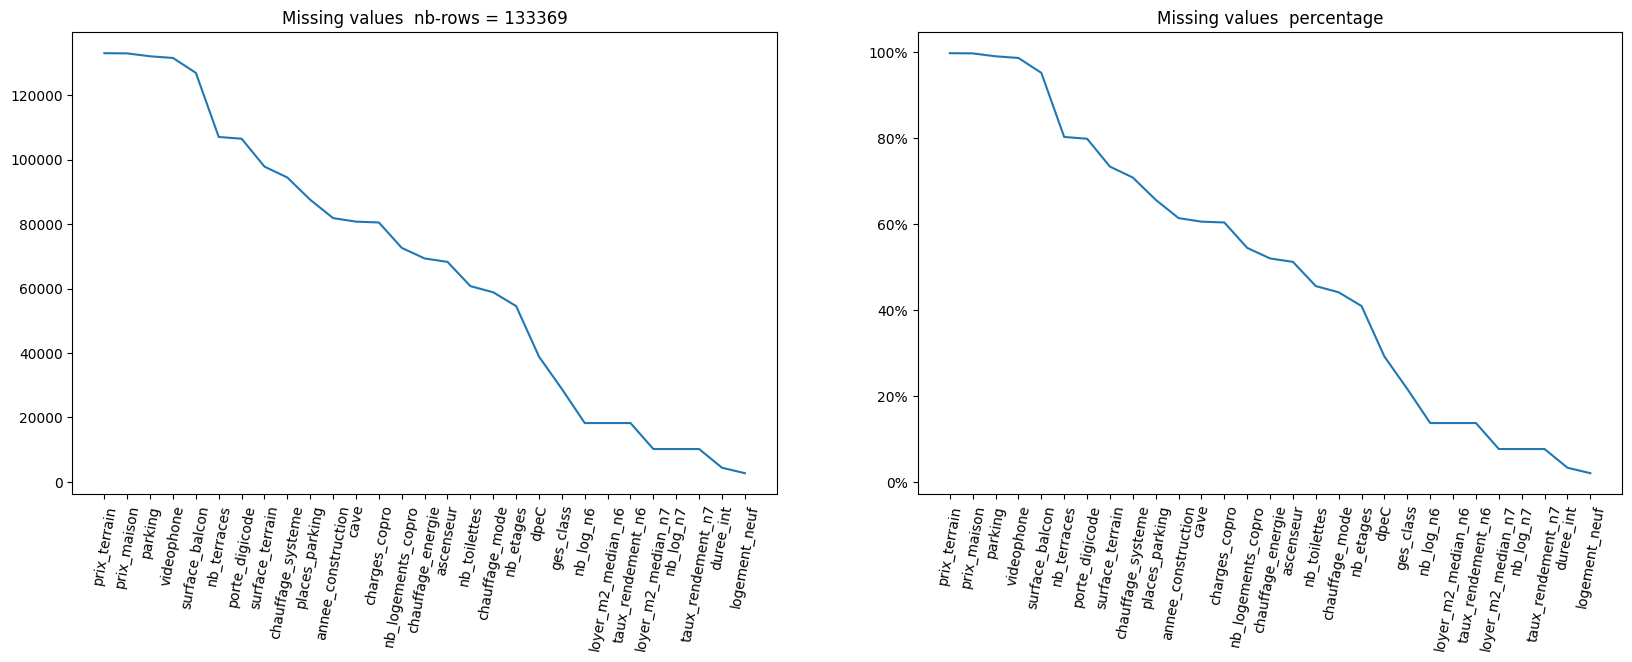

In [29]:
#  stats on Nans, display Nans for all columns
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick

nb_rows= df.shape[0]
nb_cols= df.shape[1]
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
full_columns = df.columns[ df.isna().any() == False ]
print (f" nb_rows {nb_rows} nb_cols {nb_cols}")
# print(f"columns without Nan values {full_columns.size} / {nb_cols}" )
# print (f"columns without Nans {full_columns}")
# print (missing_values)
plt.figure(figsize=(20,6))
ax = plt.subplot(121)
plt.plot (missing_values.index,missing_values.values)
plt.xticks(rotation=80)
plt.title(f"Missing values  nb-rows = {nb_rows}")
ax2 = plt.subplot(122)
missing_values_percent = (missing_values/nb_rows)*100.0
plt.plot (missing_values_percent.index,missing_values_percent.values)
plt.xticks(rotation=80)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(100)) 
plt.title(f"Missing values  percentage")
plt.show()



59
columns without Nan values 30 / 59


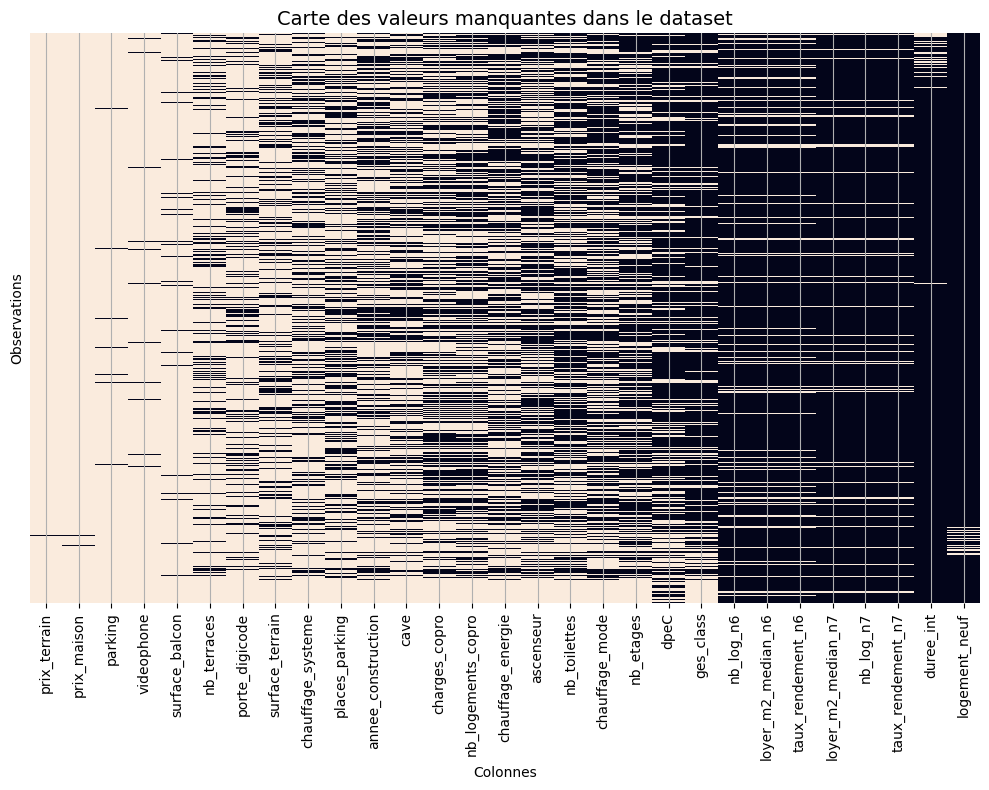

In [3]:
# Visualisation: Heatmap des valeurs manquantes
nb_rows= df.shape[0]
nb_cols= df.shape[1]
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
full_columns = df.columns[ df.isna().any() == False ]
print (nb_cols)
print(f"columns without Nan values {full_columns.size} / {nb_cols}" )

plt.figure(figsize=(10, 8))
sns.heatmap(df[missing_values.index].isna(), 
            cbar=False,
            yticklabels=False)
plt.title("Carte des valeurs manquantes dans le dataset", fontsize=14)
plt.xlabel("Colonnes")
plt.ylabel("Observations")
plt.tight_layout()
plt.grid(True)
plt.show()



In [14]:
# # drop empty columns : columns with more that 90 % of null values
print (df.shape)
threshold = 0.9
threshold = int(nb_rows*threshold)
empty_cols = []
for name,_ in df.items() :
    if df[name].isna().sum() > threshold :
        empty_cols.append(name) 
print (f"empty cols to remove  {empty_cols}")
# remove empty cols
df = df.drop(columns=empty_cols)

print(f"columns after processing {df.columns.size} / {nb_cols}" )
display(df.head(10))

(133352, 75)
empty cols to remove  ['prix_maison', 'prix_terrain', 'parking', 'videophone', 'surface_balcon']
columns after processing 70 / 59


idannonce type_annonceur typedebien  \
0          entities-1039632-3305176             pr          m   
1    hektor-actueltransactions-3769             pr          m   
2  hektor-avenirinvestissement-5792             pr          m   
3                ag011063-457293005             pr          m   
4     netty-lannexeimmo2-house-1323             pr          m   
5                iad-france-1751017             pr          m   
6             hektor-1_flandin-2987             pr          a   
7          entities-1037644-4587187             pr          m   
8          entities-1037644-4587189             pr          m   
9              immo-facile-47259141             pr          a   

  typedetransaction  etage  surface  surface_terrain  nb_pieces  prix_bien  \
0                 v      0       50            233.0          3     279000   
1                 v      0      170           1222.0          6     450000   
2                 v      0      176           1000.0          5     695000   
3                 v      0      210            450.0          6     695000   
4                 v      0      142            643.0          6     769000   
5                 v      0      274            925.0          8     950000   
6                 v      1       85              NaN          4     347000   
7                 v      0       94            370.0          4     415200   
8                 v      0      101            370.0          5     410000   
9                 v      1       45              NaN          2     168000   

   mensualiteFinance  ...  chauf-sys-convecteur  chauf-sys-radiateur  \
0                  0  ...                     0                    0   
1                  0  ...                     0                    1   
2                  0  ...                     0                    0   
3                  0  ...                     0                    0   
4                  0  ...                     0                    0   
5                  0  ...                     0                    0   
6                  0  ...                     0                    0   
7                  0  ...                     0                    0   
8                  0  ...                     0                    0   
9                  0  ...                     0                    1   

   chauf-sys-chaudière chauf-sys-sol  chauf-sys-poêle-bois  expo-triple  \
0                    0             0                     0            0   
1                    0             0                     0            0   
2                    0             0                     0            0   
3                    0             0                     0            0   
4                    0             0                     0            0   
5                    0             0                     0            0   
6                    0             1                     0            0   
7                    0             0                     0            0   
8                    0             0                     0            0   
9                    0             0                     0            0   

   expo-nord expo-sud  expo-est  expo-ouest  
0          0        0         0           0  
1          0        0         0           0  
2          0        0         1           1  
3          0        0         0           0  
4          0        1         0           0  
5          0        0         0           0  
6          0        0         1           0  
7          0        0         0           0  
8          0        0         0           0  
9          0        0         1           0  

[10 rows x 70 columns]

In [4]:
# display unique values for categorial columns for analysis

columns_categorial = df.select_dtypes(include="object").columns.tolist()
for column in columns_categorial:
    print(f"{column}: {df[column].unique()}")
# # columns = ["type_annonceur","typedebien_lite",'duree_int']
# # df = df.drop(columns=columns)
# # print(f"columns after processing {df.columns.size} / {nb_cols}" )

idannonce: ['entities-1039632-3305176' 'hektor-actueltransactions-3769'
 'hektor-avenirinvestissement-5792' ... '143623871' '140206445'
 '139314305']
type_annonceur: ['pr']
typedebien: ['m' 'a' 'an' 'mn' 'l' 'Maison/Villa neuve']
typedetransaction: ['v' 'vp' 'pi']
dpeL: ['A' 'F' 'C' '0' 'D' 'E' 'G' 'B' 'NS' 'VI' 'D - 231 kWh/m².year' 'Blank'
 'D-218 kWh/m².year']
annonce_exclusive: ['0' 'Non' 'Oui']
parking: [nan True False]
cave: [nan False True]
exposition: ['0' 'Ouest' 'Sud-Ouest' 'Est-Ouest' 'Est' 'Sud-Est' 'Sud' 'sud-ouest'
 'Nord-Sud' 'SO' 'traversant' 'Nord' 'Nord-Ouest' 'Nord-Est' 'sud-est'
 'Sud-Est-Ouest' 'traversant nord-sud' 'nord-ouest / sud-est'
 'Traversant-Est-Ouest' 'N' 'Nord Sud Est' 'EST' 'Nord Sud Ouest'
 'Nord Est Ouest' 'Nord-est' 'NE' 'NS' 'SUD' 'Sud/Ouest' 'N/S' 'NO'
 'nord-est / sud-ouest' 'EST OUEST' 'NORD SUD' 'Nord-ouest'
 'Ouest - Sud - Est' 'Nord Sud Est Ouest' 'Nord, Ouest' 'OUEST' 'Sud/Est'
 'est ouest' 'Sud et Ouest' 'NORD OUEST' 'SUD EST' 'sud ouest' '

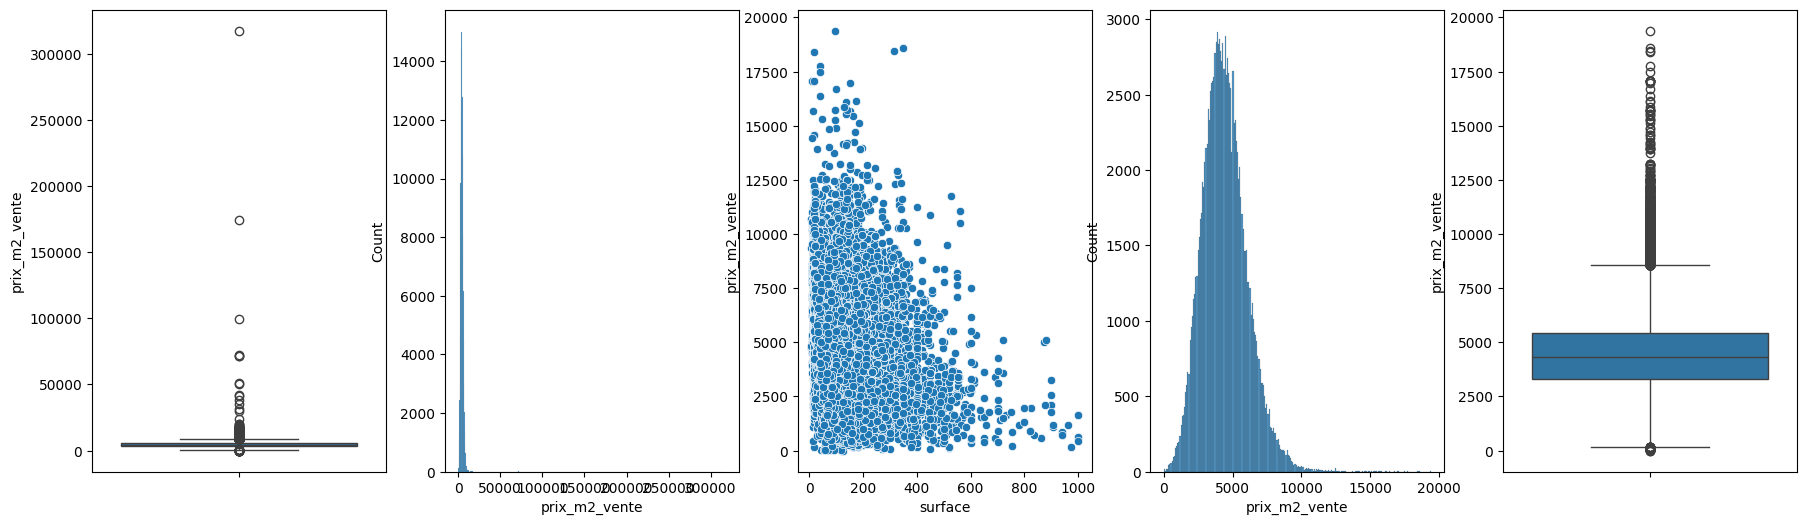

In [3]:
#  analyze prix de vente , chop at 20000 
plt.figure(figsize=(22,6))
plt.subplot(151)
sns.boxplot(df['prix_m2_vente'])
plt.subplot(152)
sns.histplot(df['prix_m2_vente'])
plt.subplot(153)
df = df [df['prix_m2_vente'] <20000].reset_index(drop=True)

sns.scatterplot (df,x="surface",y="prix_m2_vente")
plt.subplot(154)
sns.histplot(df['prix_m2_vente'])
plt.subplot(155)
sns.boxplot(df['prix_m2_vente'])
plt.show()


Nombre de catégories idannonce : 133352
Nombre de catégories type_annonceur : 1
Nombre de catégories typedebien : 6
Nombre de catégories typedetransaction : 3
Nombre de catégories dpeL : 13
Nombre de catégories annonce_exclusive : 3
Nombre de catégories cave : 2
Nombre de catégories exposition : 8
Nombre de catégories ges_class : 12
Nombre de catégories porte_digicode : 2
Nombre de catégories ascenseur : 2
Nombre de catégories chauffage_energie : 5
Nombre de catégories chauffage_systeme : 9
Nombre de catégories chauffage_mode : 3
Nombre de catégories categorie_annonceur : 6
Nombre de catégories logement_neuf : 2
Nombre de catégories typedebien_lite : 4
Nombre de catégories date : 73
Nombre de catégories TYP_IRIS_x : 4
Nombre de catégories TYP_IRIS_y : 4
catégories idannonce : ['entities-1039632-3305176' 'hektor-actueltransactions-3769'
 'hektor-avenirinvestissement-5792' ... '143623871' '140206445'
 '139314305']
catégories type_annonceur : ['pr']
catégories typedebien : ['m' 'a' 'an' '

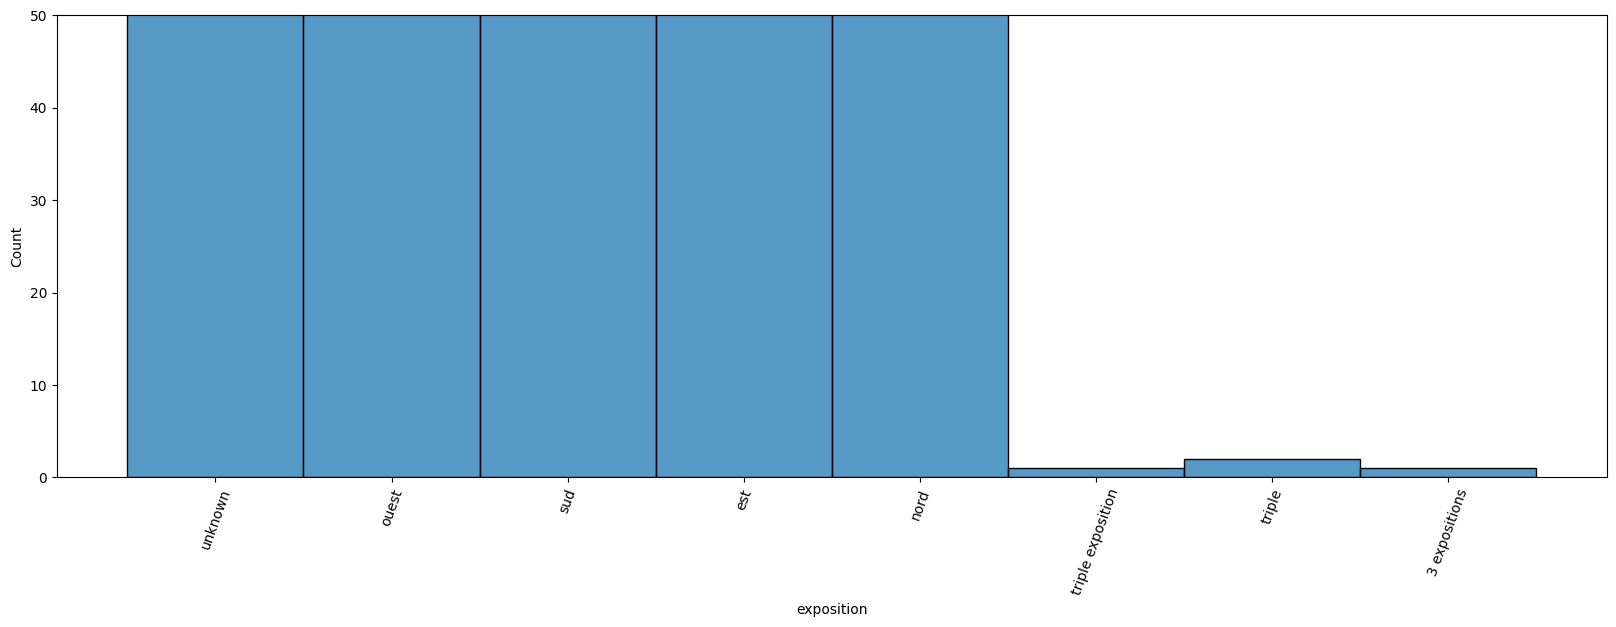

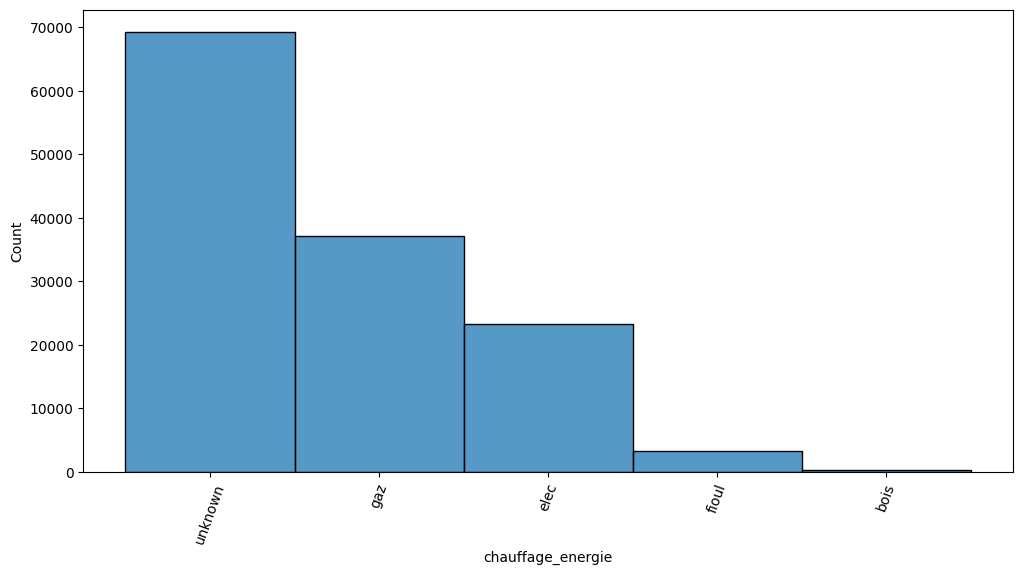

([0, 1, 2],
 [Text(0, 0, 'unknown'), Text(1, 0, 'Individuel'), Text(2, 0, 'Collectif')])

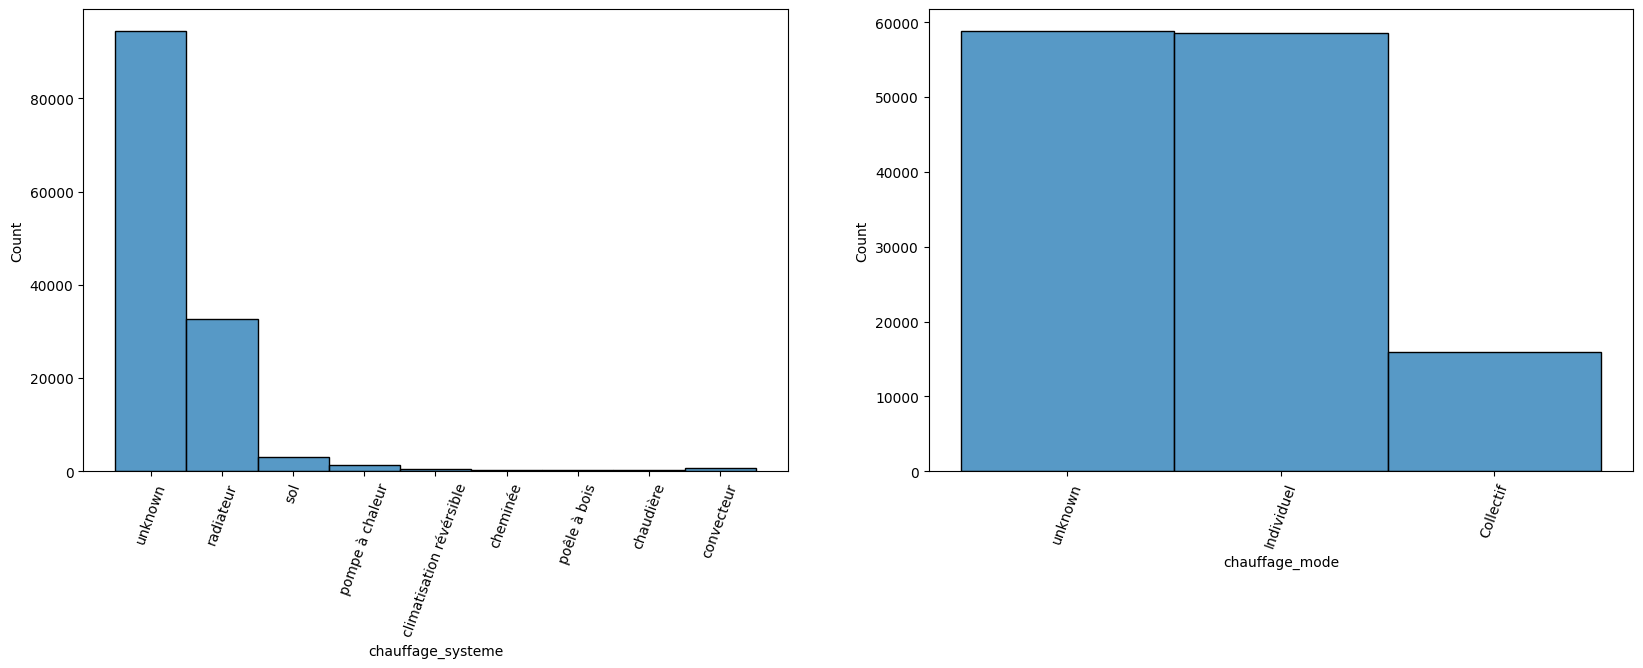

In [16]:
#  view number of values for categorial data
for col in df.select_dtypes('O'):
    print(f'Nombre de catégories {col} : {df[col].nunique()}')

for col in df.select_dtypes('O'):
    print(f'catégories {col} : {df[col].unique()}')

plt.figure(figsize=(20,6))
sns.histplot(df['exposition'])
plt.xticks(rotation=70)
plt.ylim(0,50)
plt.show()
plt.figure(figsize=(12,6))
sns.histplot(df['chauffage_energie'])
plt.xticks(rotation=70)
plt.show()
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.histplot(df['chauffage_systeme'])
plt.xticks(rotation=70)
plt.subplot(122)
sns.histplot(df['chauffage_mode'])
plt.xticks(rotation=70)

In [ ]:
df1 = df.select_dtypes(exclude = ['object'])
plt.figure(figsize=(16,15))
sns.heatmap(df1.corr(),annot=True, cmap="crest", center =0,fmt=".1f")


In [ ]:
# sns.pairplot(data=df)

['unknown' 'Individuel' 'Collectif']
0
chauffage_mode
unknown       58821
Individuel    58532
Collectif     15999
Name: count, dtype: int64
chauffage_mode
unknown       58821
Individuel    58532
Collectif     15999
Name: count, dtype: int64


<Axes: xlabel='chauffage_mode', ylabel='Count'>

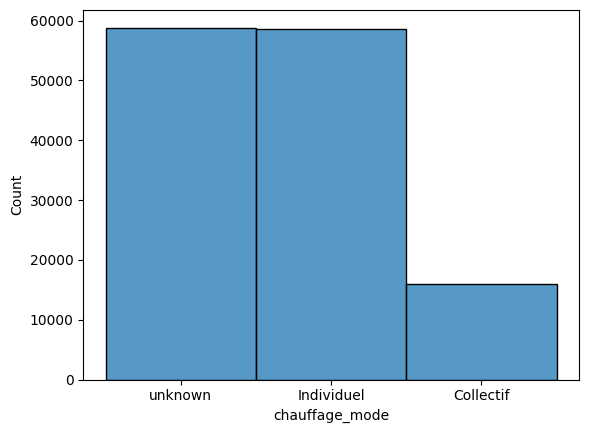

In [17]:
#simplfy chauffage mode, 50% isna
print(df["chauffage_mode"].unique())
print(df["chauffage_mode"].isna().sum())
df["chauffage_mode"] = df["chauffage_mode"].fillna("unknown")
print(df["chauffage_mode"].value_counts())
df["chauffage_mode"] = df["chauffage_mode"].apply(lambda x : "Individuel"  if "Individuel" in x else x)
df["chauffage_mode"] = df["chauffage_mode"].apply(lambda x : "Collectif"  if "Central" in x else x)
print(df["chauffage_mode"].value_counts())

sns.histplot(df["chauffage_mode"])


0
chauffage_energie
unknown    69321
gaz        37195
elec       23281
fioul       3228
bois         327
Name: count, dtype: int64
['unknown' 'gaz' 'elec' 'fioul' 'bois']
chauf-bois
chauf-bois
0    133025
1       327
Name: count, dtype: int64
chauf-fioul
chauf-fioul
0    130124
1      3228
Name: count, dtype: int64
chauf-gaz
chauf-gaz
0    96157
1    37195
Name: count, dtype: int64
chauf-elec
chauf-elec
0    110071
1     23281
Name: count, dtype: int64


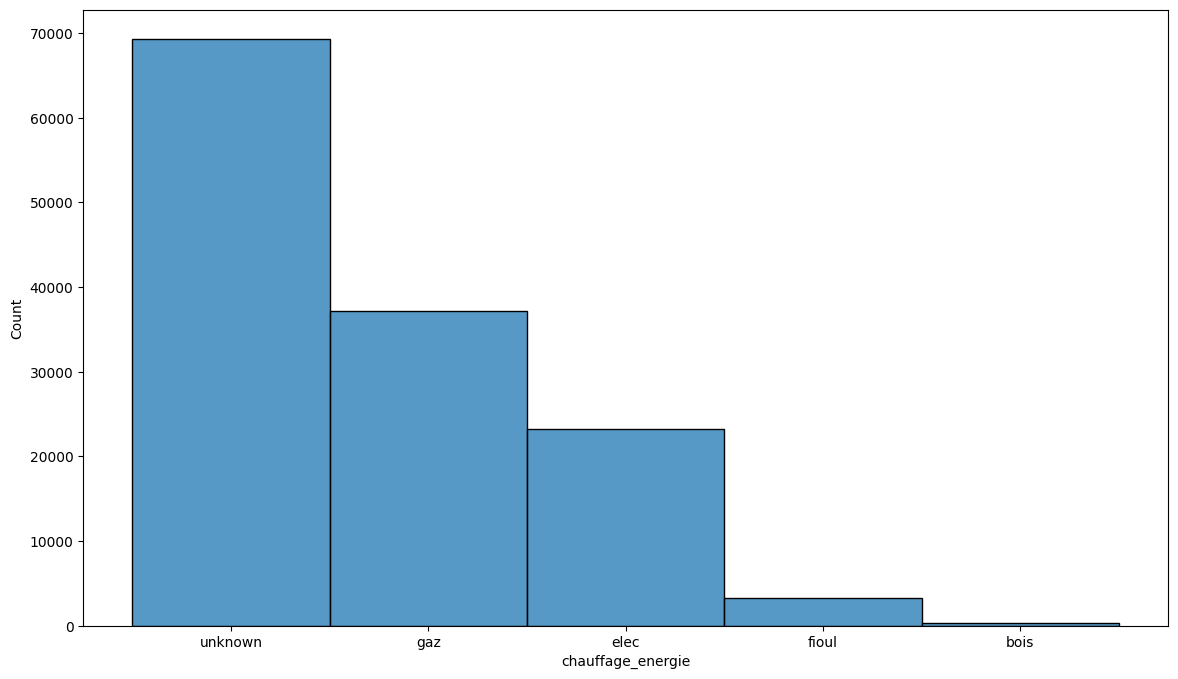

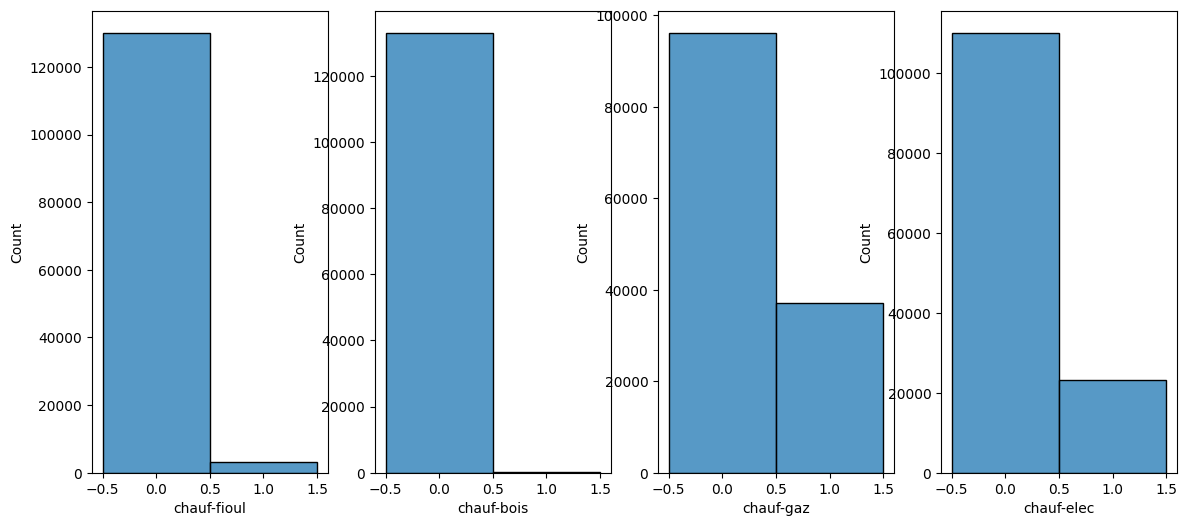

In [18]:
#simplify chauffage energie
# print(df["chauffage_energie"].unique())
print(df["chauffage_energie"].isna().sum())
df["chauffage_energie"] = df["chauffage_energie"].fillna("unknown")
print(df["chauffage_energie"].value_counts())
df['chauffage_energie'] = df['chauffage_energie'].str.lower()
df['chauffage_energie'] = df['chauffage_energie'].replace(to_replace=[", "," ,",","],value=[",",",",","],regex=True)


df["chauffage_energie"] = df["chauffage_energie"].replace(to_replace=["électrique"],value=["elec"],regex=True)
print(df["chauffage_energie"].unique())

#  create sub-categories
energies = ["bois","fioul","gaz","elec"]
for energy in energies :
    target = "chauf-" + energy
    print(target)
    df[target] = df["chauffage_energie"].apply(lambda x : 1 if energy in x else 0)
    print (df[target].value_counts())

#  simplify chauffage-energie to first value
df["chauffage_energie"] = df["chauffage_energie"].apply(lambda x : "gaz"  if "gaz" in x else x)
df["chauffage_energie"] = df["chauffage_energie"].replace(to_replace=["fioul,bois","bois,fioul","elec,bois","fioul,elec","elec,fioul","bois,elec","elec,bois,fioul"],value=["fioul","bois","elec","fioul","elec","bois","elec"])

plt.figure(figsize=(14,8))
sns.histplot(df["chauffage_energie"])

plt.figure(figsize=(14,6))
plt.subplot(141)
sns.histplot(df["chauf-fioul"],discrete=True)
plt.subplot(142)
sns.histplot(df["chauf-bois"],discrete=True)
plt.subplot(143)
sns.histplot(df["chauf-gaz"],discrete=True)
plt.subplot(144)
sns.histplot(df["chauf-elec"],discrete=True)
plt.show()


[nan 'Radiateur' 'Sol' 'Pompe à chaleur' 'Climatisation révérsible'
 'Pompe à chaleur, Radiateur' 'Cheminée'
 'Cheminée, Fluide caloporteur, Poêle à Bois' 'Poêle à Bois'
 'Pompe à chaleur, Sol' 'Chaudière' 'Convecteur' 'Radiateur, Chaudière'
 'Pompe à chaleur, Climatisation révérsible'
 'Sol, Climatisation révérsible' 'Cheminée, Poêle à Bois'
 'Climatisation révérsible, Poêle à Bois' 'Sol, Poêle à Bois'
 'Sol, Chaudière' 'Pompe à chaleur, Cheminée, Poêle à Bois'
 'Fluide caloporteur' 'Radiateur, Cheminée' 'Pompe à chaleur, Convecteur'
 'Radiateur, Poêle à Bois' 'Sol, Cheminée'
 'Radiateur, Climatisation révérsible' 'Pompe à chaleur, Poêle à Bois'
 'Convecteur, Poêle à Bois' 'Chaudière, Poêle à Bois'
 'Convecteur, Cheminée, Poêle à Bois' 'Cheminée, Chaudière'
 'Cheminée, Climatisation révérsible' 'Sol, Radiateur' 'Sol, Convecteur'
 'Fluide caloporteur, Poêle à Bois']
94428
chauf-sys-climatisation
chauf-sys-climatisation
0    132829
1       523
Name: count, dtype: int64
chauf-sys-pompe-c

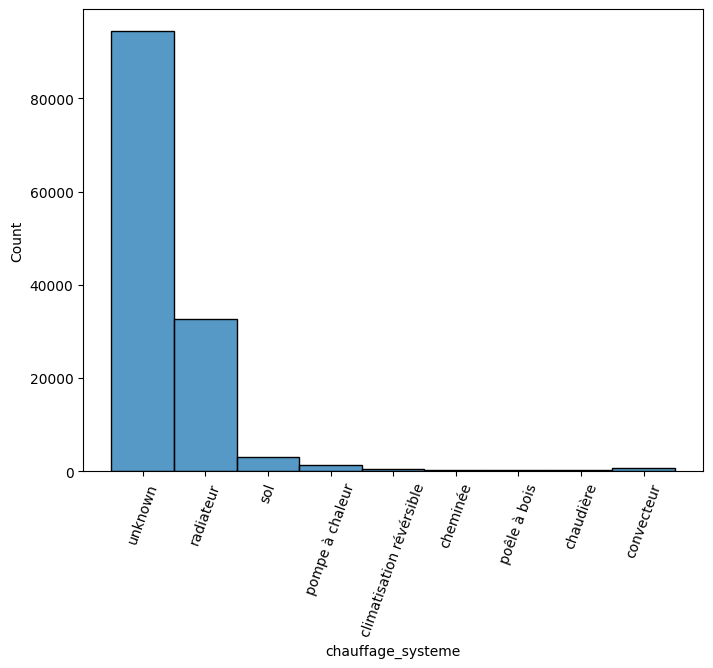

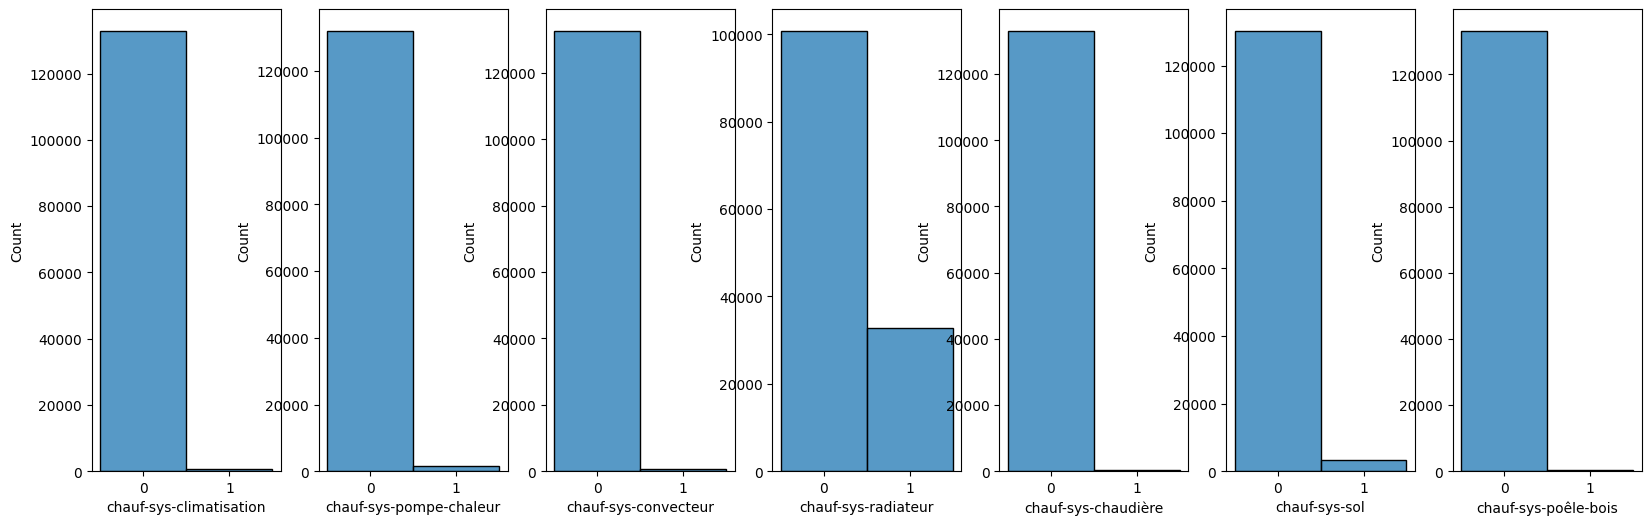

In [10]:
# simplfy systeme de chaufage

print(df["chauffage_systeme"].unique())
print(df["chauffage_systeme"].isna().sum())
df["chauffage_systeme"] = df["chauffage_systeme"].fillna("unknown")

df['chauffage_systeme'] = df['chauffage_systeme'].str.lower()
df['chauffage_systeme'] = df['chauffage_systeme'].replace(to_replace=[", "," ,",","],value=[",",",",","],regex=True)

name = "fluide caloporteur"
df["chauffage_systeme"] = df["chauffage_systeme"].apply(lambda x : "pompe à chaleur" if name in x else x)

#  create sub-categories
energies = ["climatisation","pompe à chaleur","convecteur","radiateur","chaudière","sol","poêle à bois"]
outers = ["climatisation","pompe-chaleur","convecteur","radiateur","chaudière","sol","poêle-bois"]
for energy,outer in zip(energies,outers) :
    target = "chauf-sys-" + outer
    print(target)
    df[target] = df["chauffage_systeme"].apply(lambda x : 1 if energy in x else 0)
    print (df[target].value_counts())

names = ["climatisation révérsible","pompe à chaleur","convecteur","radiateur","chaudière","sol","poêle à bois"]
for name in names : 
    df["chauffage_systeme"] = df["chauffage_systeme"].apply(lambda x : name if name in x else x)

plt.figure(figsize=(8,6))
sns.histplot(df["chauffage_systeme"])
plt.xticks(rotation=70)
plt.show()

plt.figure(figsize=(20,6))

plt.subplot(171)
sns.histplot(df["chauf-sys-climatisation"],discrete=True)
plt.subplot(172)
sns.histplot(df["chauf-sys-pompe-chaleur"],discrete=True)
plt.subplot(173)
sns.histplot(df["chauf-sys-convecteur"],discrete=True)
plt.subplot(174)
sns.histplot(df["chauf-sys-radiateur"],discrete=True)
plt.subplot(175)
sns.histplot(df["chauf-sys-chaudière"],discrete=True)
plt.subplot(176)
sns.histplot(df["chauf-sys-sol"],discrete=True)
plt.subplot(177)
sns.histplot(df["chauf-sys-poêle-bois"],discrete=True)

plt.show()



In [ ]:
print(df["dpeL"].unique())
print(df["dpeL"].isna().sum())
print(df["dpeL"].value_counts())
df["dpeL"] = df["dpeL"].replace(to_replace=["D - 231 kWh/m².year","D-218 kWh/m².year","Blank"],value=["D","D","Unknown"])
print(df["dpeL"].value_counts())

sns.histplot(df["dpeL"])


In [ ]:
# gaz a effet de serre : set to unknown
print(df["ges_class"].isna().sum())
df["ges_class"] = df["ges_class"].fillna("Unknown")
df["ges_class"] = df["ges_class"].replace(to_replace=["D - 49 kg CO2/m².year","E-41 kg CO2/m².year","Blank"],value=["D","E","Unknown"])
print(df["ges_class"].value_counts())

sns.histplot(df["ges_class"])


['Unknown' 'ouest' 'sud' 'est' 'nord' 'triple exposition' 'triple'
 '3 expositions']
['unknown' 'ouest' 'sud' 'est' 'nord' 'triple exposition' 'triple'
 '3 expositions']
['unknown' 'ouest' 'sud' 'est' 'nord' 'triple']
expo-nord
expo-nord
0    124417
1      8952
Name: count, dtype: int64
expo-sud
expo-sud
0    113410
1     19959
Name: count, dtype: int64
expo-est
expo-est
0    114663
1     18706
Name: count, dtype: int64
expo-ouest
expo-ouest
0    128228
1      5141
Name: count, dtype: int64
['unknown' 'ouest' 'sud' 'est' 'nord' 'triple']


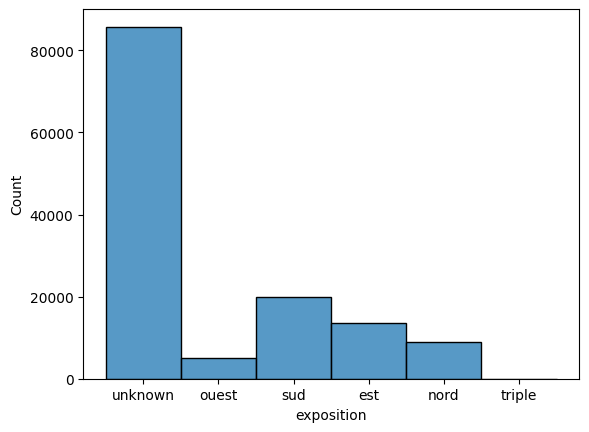

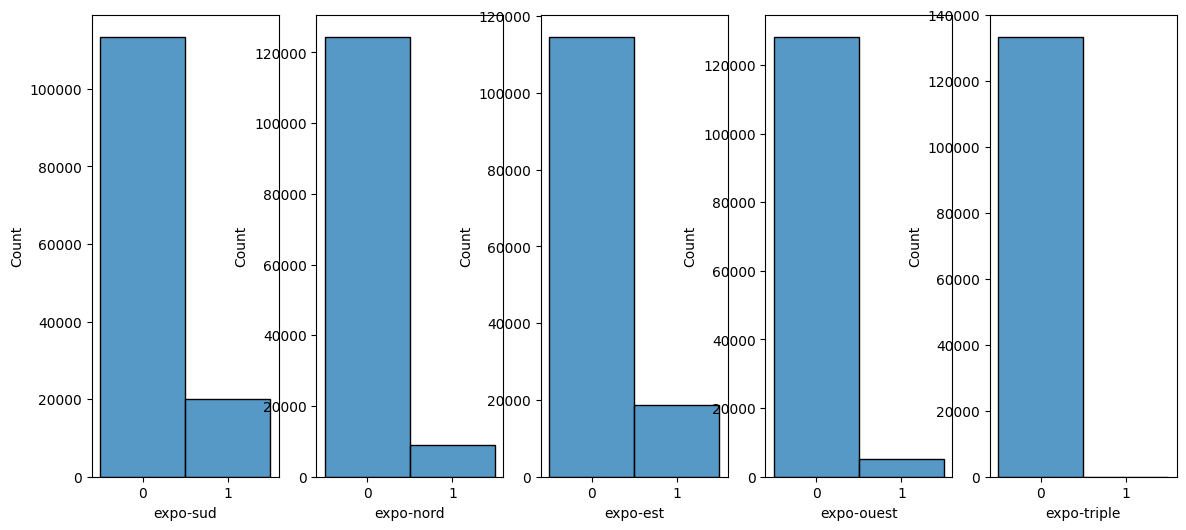

In [5]:
# refactor expositio
print (df.exposition.unique())
df['exposition'] = df['exposition'].str.lower()
print(df["exposition"].unique())
df['exposition'] = df['exposition'].replace(to_replace=[" / ","/"," - "," -"," et ",", "," ,",","],value=["-","-","-","-","-","-","-","-"],regex=True)
df['exposition'] = df['exposition'].replace(to_replace=["ne","so","n","ns","n-s","n-e-o"],value=["nord-est","sud-ouest","nord","nord-sud","nord-sud","nord-est-ouest"])

df['exposition'] = df['exposition'].replace(to_replace=["no","e-n-e","est-ouest-"],value=["nord-ouest","est-nord-est","est-ouest"])
df['exposition'] = df['exposition'].replace(to_replace=["nord-sud-(balcon)","sud-ouest-&-est","traversant-"],value=["","sud-ouest-est",""])
df['exposition'] = df['exposition'].replace(to_replace=["oest","sur","traversant"],value=["ouest","sud",""],regex=True)
# df['exposition'] = df['exposition'].replace(to_replace=[" "],value=["-"],regex=True)
df['exposition'] = df['exposition'].replace(to_replace=["-est-ouest","-sud-nord","-nord-sud"," nord-sud"," sud-nord"],value=["est-ouest","sud-nord","nord-sud","nord-sud","sud-nord"])
df['exposition'] = df['exposition'].replace(to_replace=[""],value=["Unknown"])
df['exposition'] = df['exposition'].replace(to_replace=["3 expositions","triple exposition"],value=["triple","triple"])

df["expo-triple"] = df["exposition"].apply(lambda x : 1 if ("triple" in x or "3" in x) else 0)

# df = df [df['exposition'] != "triple"].reset_index(drop=True)
# df = df [df['exposition'] != "3 expositions"].reset_index(drop=True)
# df = df [df['exposition'] != ""].reset_index(drop=True)


print(df["exposition"].unique())

# create expo-sud, expo-nord, expo-est,expo-ouest
cardinals = ["nord","sud","est","ouest"]
for cardinal in cardinals :
    target = "expo-" + cardinal
    print(target)
    df[target] = df["exposition"].apply(lambda x : 1 if cardinal in x else 0)
    print (df[target].value_counts())

# simplify exposition to est,ouest,sud,nord
df["exposition"] = df["exposition"].replace(to_replace=["0"],value=["Unknown"])
df["exposition"] = df["exposition"].apply(lambda x : "nord" if x.startswith('nord') else x)
df["exposition"] = df["exposition"].apply(lambda x : "sud" if x.startswith('sud') else x)
df["exposition"] = df["exposition"].apply(lambda x : "est" if x.startswith('est') else x)
# df["exposition"] = df["exposition"].apply(lambda x : "est" if x.startswith('-est') else x)
df["exposition"] = df["exposition"].apply(lambda x : "ouest" if x.startswith('ouest') else x)


print(df["exposition"].unique())
sns.histplot(df["exposition"])
plt.show()
plt.figure(figsize=(14,6))
plt.subplot(151)
sns.histplot(df["expo-sud"],discrete=True)
plt.subplot(152)
sns.histplot(df["expo-nord"],discrete=True)
plt.subplot(153)
sns.histplot(df["expo-est"],discrete=True)
plt.subplot(154)
sns.histplot(df["expo-ouest"],discrete=True)
plt.subplot(155)
sns.histplot(df["expo-triple"],discrete=True)
plt.show()


<class 'pandas.core.indexes.base.Index'>


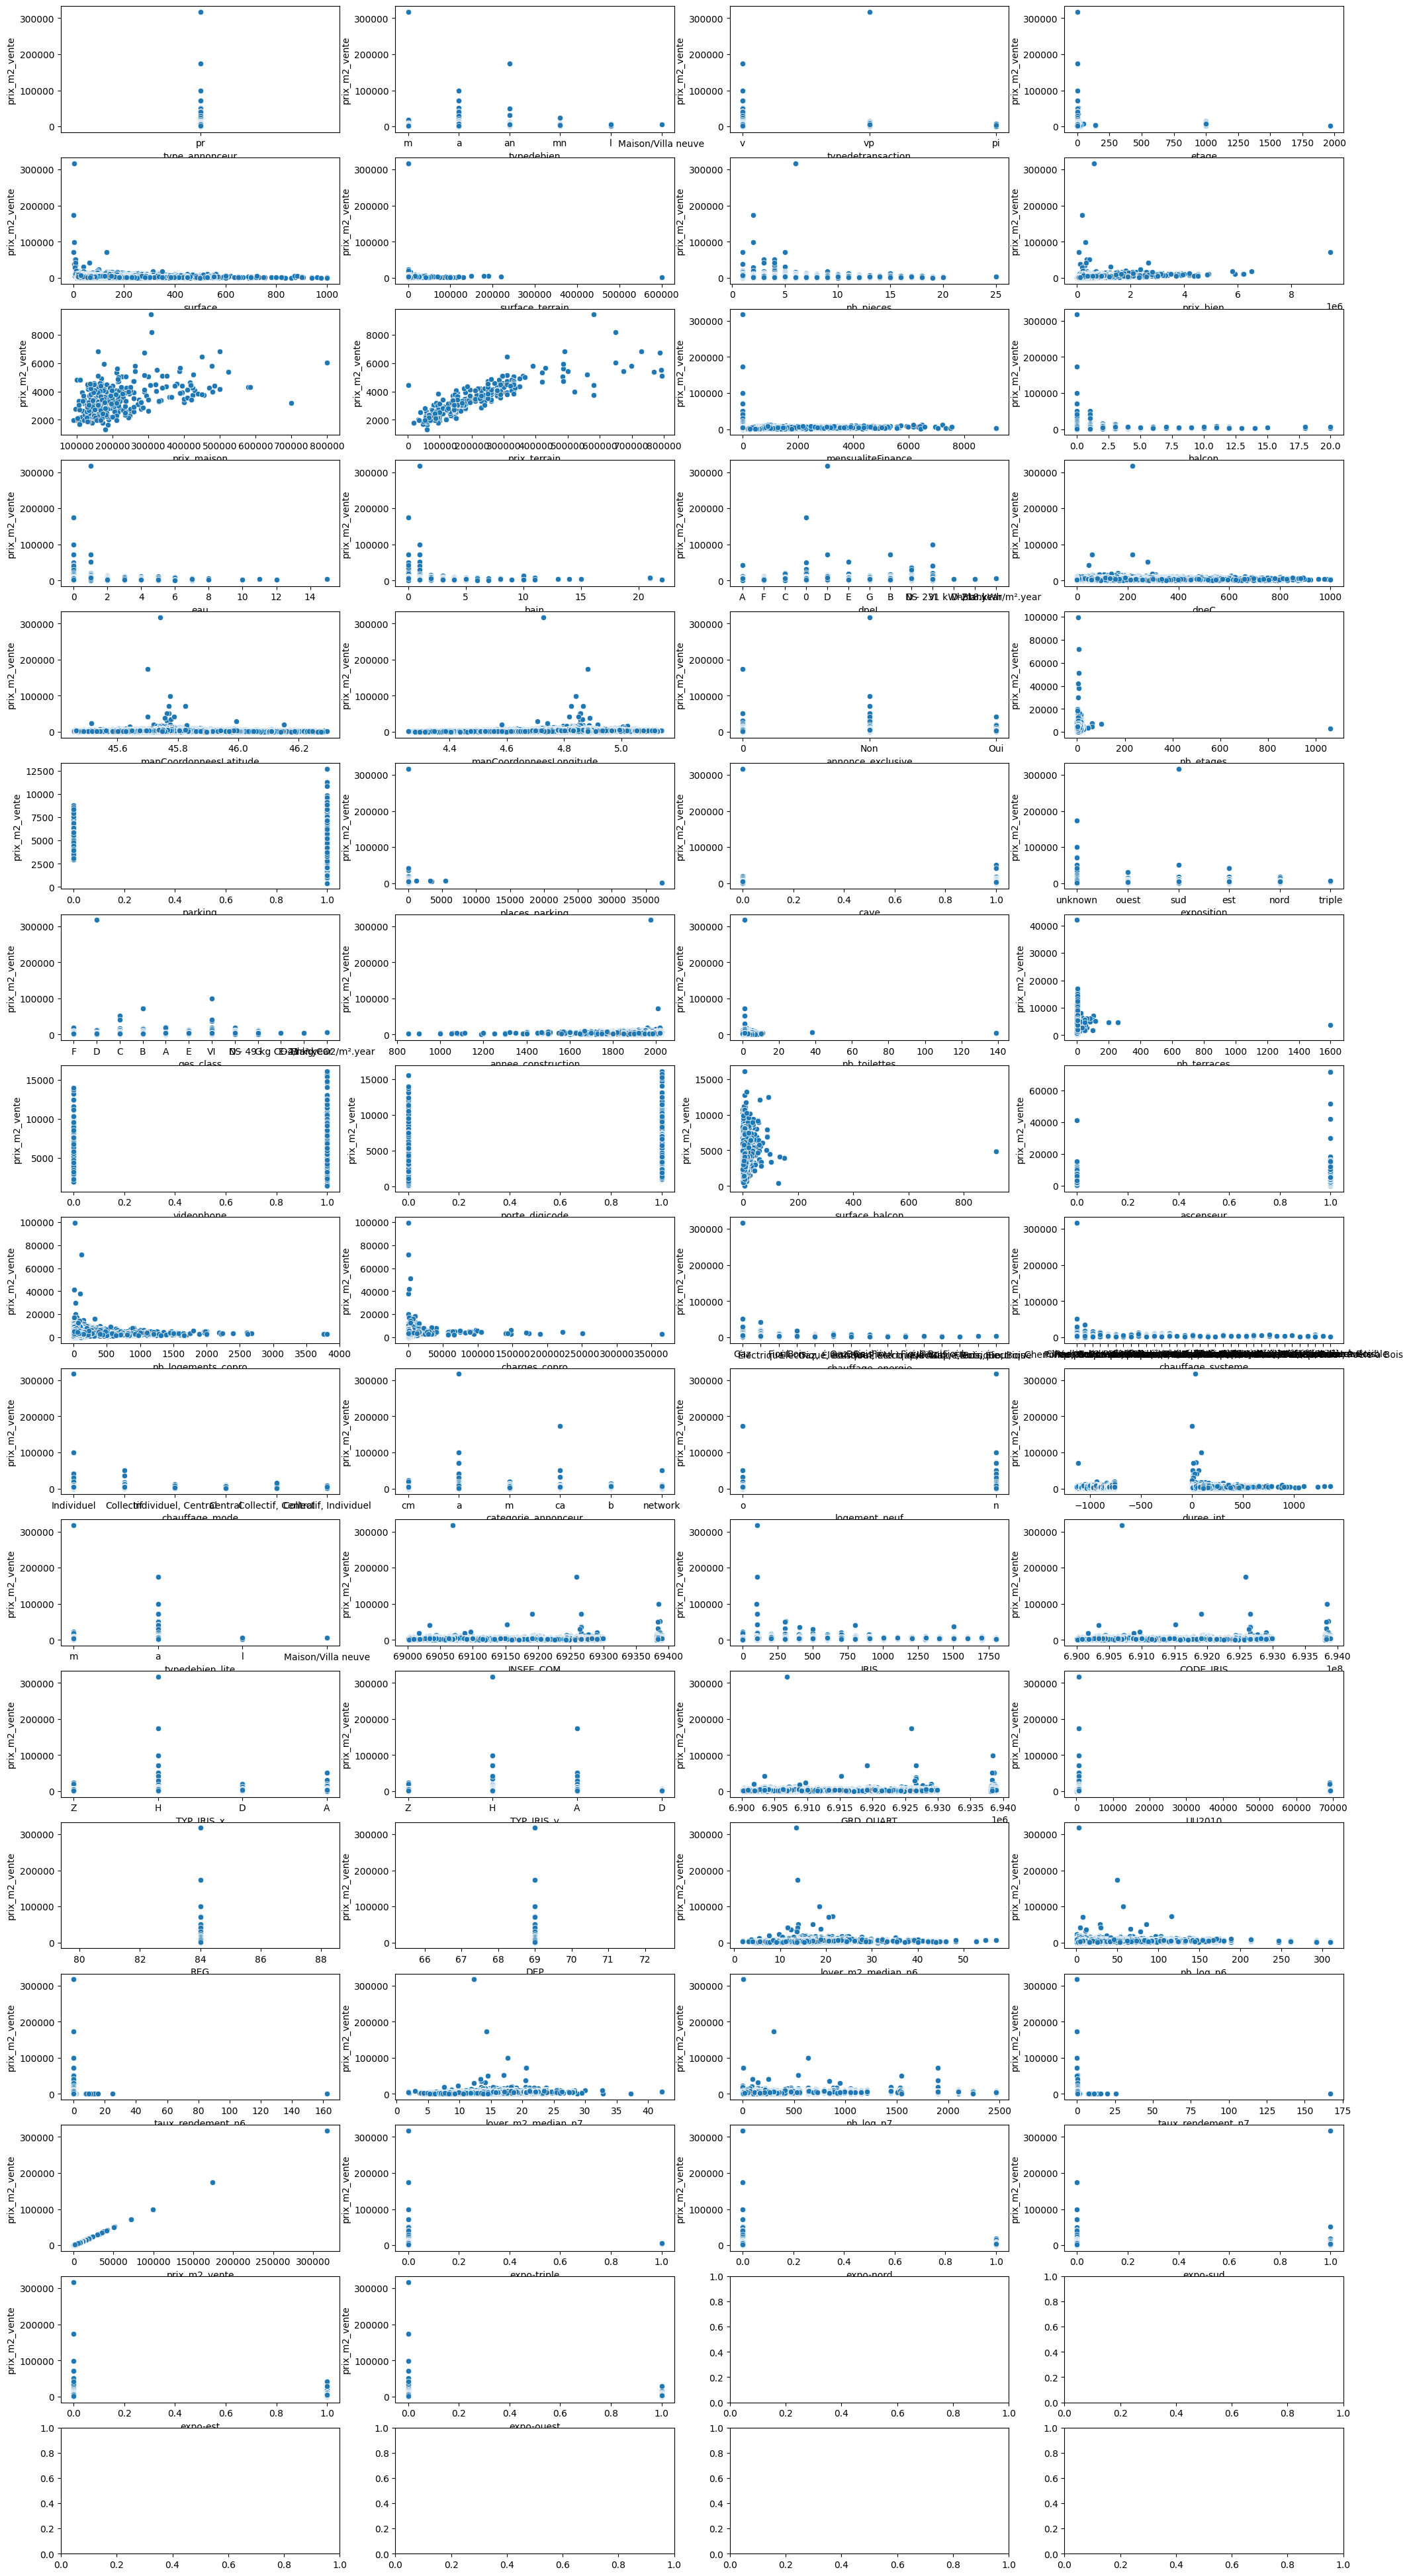

In [6]:
#  scatter plot of each column / prix_m2_vente
df.sort_values(by="prix_m2_vente",ascending=True)
columns = df.columns
print (type(columns))
nrows = int(columns.size/4) +1
fig , axes = plt.subplots(nrows = nrows, ncols = 4, figsize = (25,50))
index = 0
for column in columns :
    if column not in ["idannonce","date"] :
        sns.scatterplot(ax=axes[int(index/4),index%4],y=df["prix_m2_vente"],x=df[column])
        index = index +1


In [ ]:
import numpy as np

# clean column nb_logements_copro 
# df["nb_logements_copro"] = df["nb_logements_copro"].fillna(df["nb_logements_copro"].median()).astype("int")
# df["nb_logements_copro"].unique()

# clean annee construction 
df['annee_construction'] = df['annee_construction'].apply(lambda x : 1500  if x < 1500 else x)
df["annee_construction"].unique()
df["annee_construction"] = df["annee_construction"].fillna(df["annee_construction"].median())
df["annee_construction"] = df["annee_construction"].astype("int")


# places parking , set nan to zero
df["places_parking"] = df["places_parking"].fillna(0)
df["places_parking"] = df["places_parking"].astype("int")
df["places_parking"].unique()
df['places_parking'] = df['places_parking'].apply(lambda x : 125  if x > 125 else x)



#   nb_toilettes set Nan to 1
df["nb_toilettes"] = df["nb_toilettes"].fillna(1).astype(int)
print (df["nb_toilettes"].isna().sum())
df['nb_toilettes'] = df['nb_toilettes'].apply(lambda x : 10  if x > 10 else x)

#   dpec set Nan to 0
df["dpeC"] = df["dpeC"].fillna(0)
print (df["dpeC"].isna().sum())

# nb_etages set Nan to mean value
df["nb_etages"] = df["nb_etages"].fillna(df["nb_etages"].median()).astype(int)

# porte digicode set Nan to False
print (df['porte_digicode'].isna().sum())
df["porte_digicode"] = df["porte_digicode"].fillna(False)

# loyer fillna to zero
attributes = ["loyer_m2_median_n6","nb_log_n6","taux_rendement_n6"]
for attribute in attributes :
    df[attribute]= df[attribute].fillna(0)
    
attributes = ["loyer_m2_median_n7","nb_log_n7","taux_rendement_n7"]
for attribute in attributes :
    df[attribute]= df[attribute].fillna(0)


# surface / remove spurious value


#  number of logments copro : limit max
# df['nb_logements_copro'] = df['nb_logements_copro'].apply(lambda x : 2500  if x >2500  else x)

# nb_terrace remove surious value
df['nb_terraces'] = df['nb_terraces'].apply(lambda x : df['nb_terraces'].median()  if x >200  else x)
df["nb_terraces"] = df["nb_terraces"].fillna(0)

# cave fillna 0
df["cave"] = df["cave"].fillna(0)

# logement neuf
df["logement_neuf"] = df["logement_neuf"].fillna('u')
print (df["logement_neuf"].unique())

# ascenceur
# print (df["ascenseur"].unique())
# df["ascenseur"] = df["ascenseur"].fillna(2)
# df["ascenseur"] = df["ascenseur"].replace(to_replace=[True,False],value=[1,0]).astype(int)

# ascenceur
print (df["duree_int"].unique())
df["duree_int"] = df["duree_int"].fillna(0)


60000.0
 0.0 60000.0 


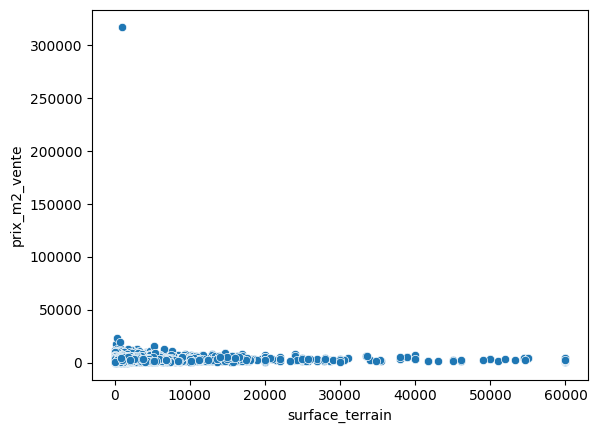

In [ ]:
# surface terrain : what is the limit
print (df['surface_terrain'].max())
print (f" {df['surface_terrain'].min()} {df['surface_terrain'].max()} ")
sns.scatterplot(y=df["prix_m2_vente"],x=df["surface_terrain"])
df['surface_terrain'] = df['surface_terrain'].apply(lambda x : 60000  if x > 60000 else x)

copro isna 0
 0.0 7900.0 


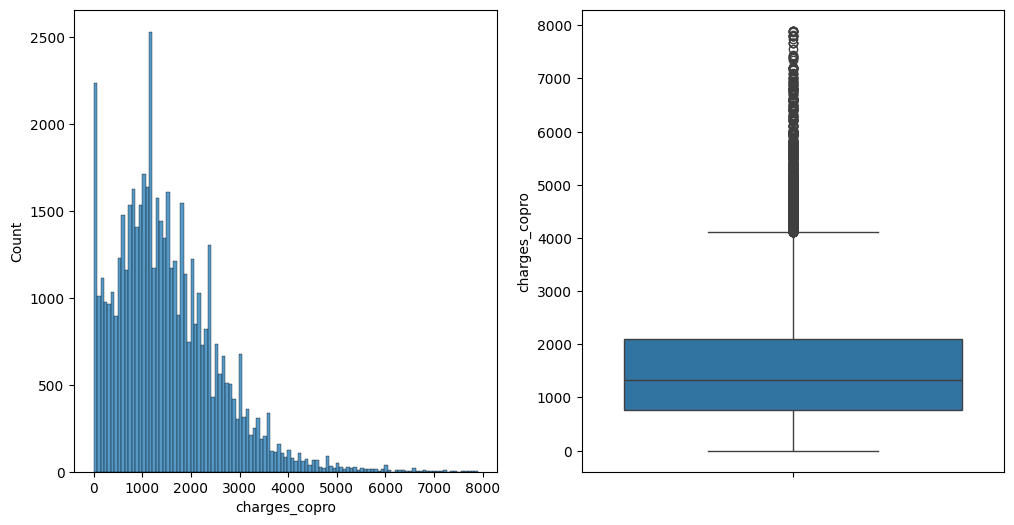

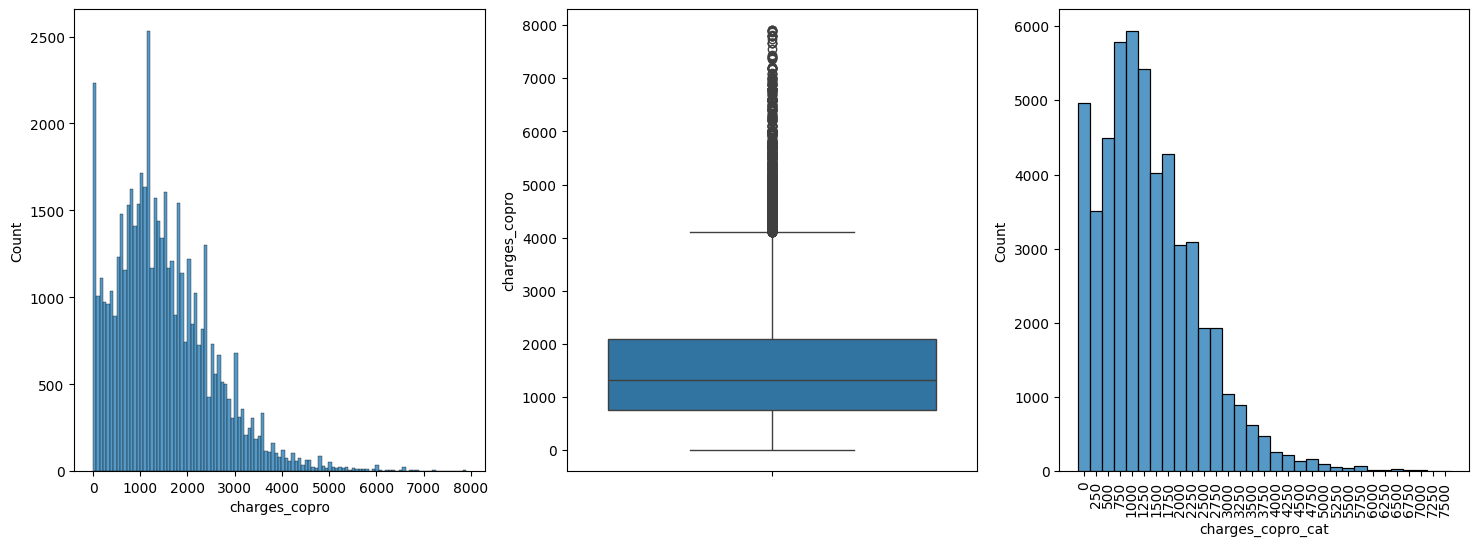

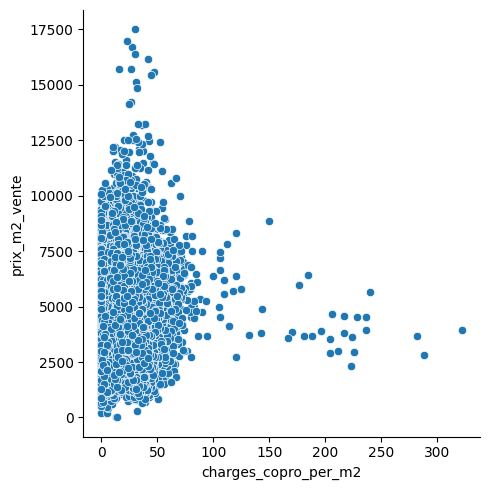

In [17]:

# charges copro
# charges copro / remove spurious value
# df = df.reindex(sorted(df.columns), axis=1)

import numpy as np

print (f"copro isna {df.charges_copro.isna().sum()}")

plt.figure(figsize=(12,6))
plt.subplot(121)
sns.histplot(df["charges_copro"])
plt.subplot(122)
sns.boxplot(df["charges_copro"])
# print (df["charges_copro"].unique())
print (f" {df['charges_copro'].min()} {df['charges_copro'].max()} ")

# filna with zeros
# df['charges_copro'] = df['charges_copro'].fillna(df['charges_copro'].median())

plt.show()
max_value = 8000
plt.figure(figsize=(18,6))
df= df [df['charges_copro']< max_value]
plt.subplot(131)
sns.histplot(df["charges_copro"])
plt.subplot(132)
sns.boxplot(df["charges_copro"])
bins = np.arange(0,max_value,250).tolist()
labels = [str(x) for x in bins]
labels.pop()
df['charges_copro_cat']=pd.cut(x = df['charges_copro'],bins=bins,labels=labels,include_lowest = True)
plt.subplot(133)
sns.histplot(df["charges_copro_cat"],bins=250)
plt.xticks(rotation=90)
plt.show()

df['charges_copro_per_m2']= df['charges_copro']/df['surface']

sns.relplot(df,x="charges_copro_per_m2",y="prix_m2_vente")
plt.show()

In [59]:
print (df.isna().sum())

idannonce                 0
type_annonceur            0
typedebien                0
typedetransaction         0
etage                     0
                         ..
expo-sud                  0
expo-est                  0
expo-ouest                0
charges_copro_cat        11
charges_copro_surface     0
Length: 77, dtype: int64


<class 'pandas.core.indexes.base.Index'>


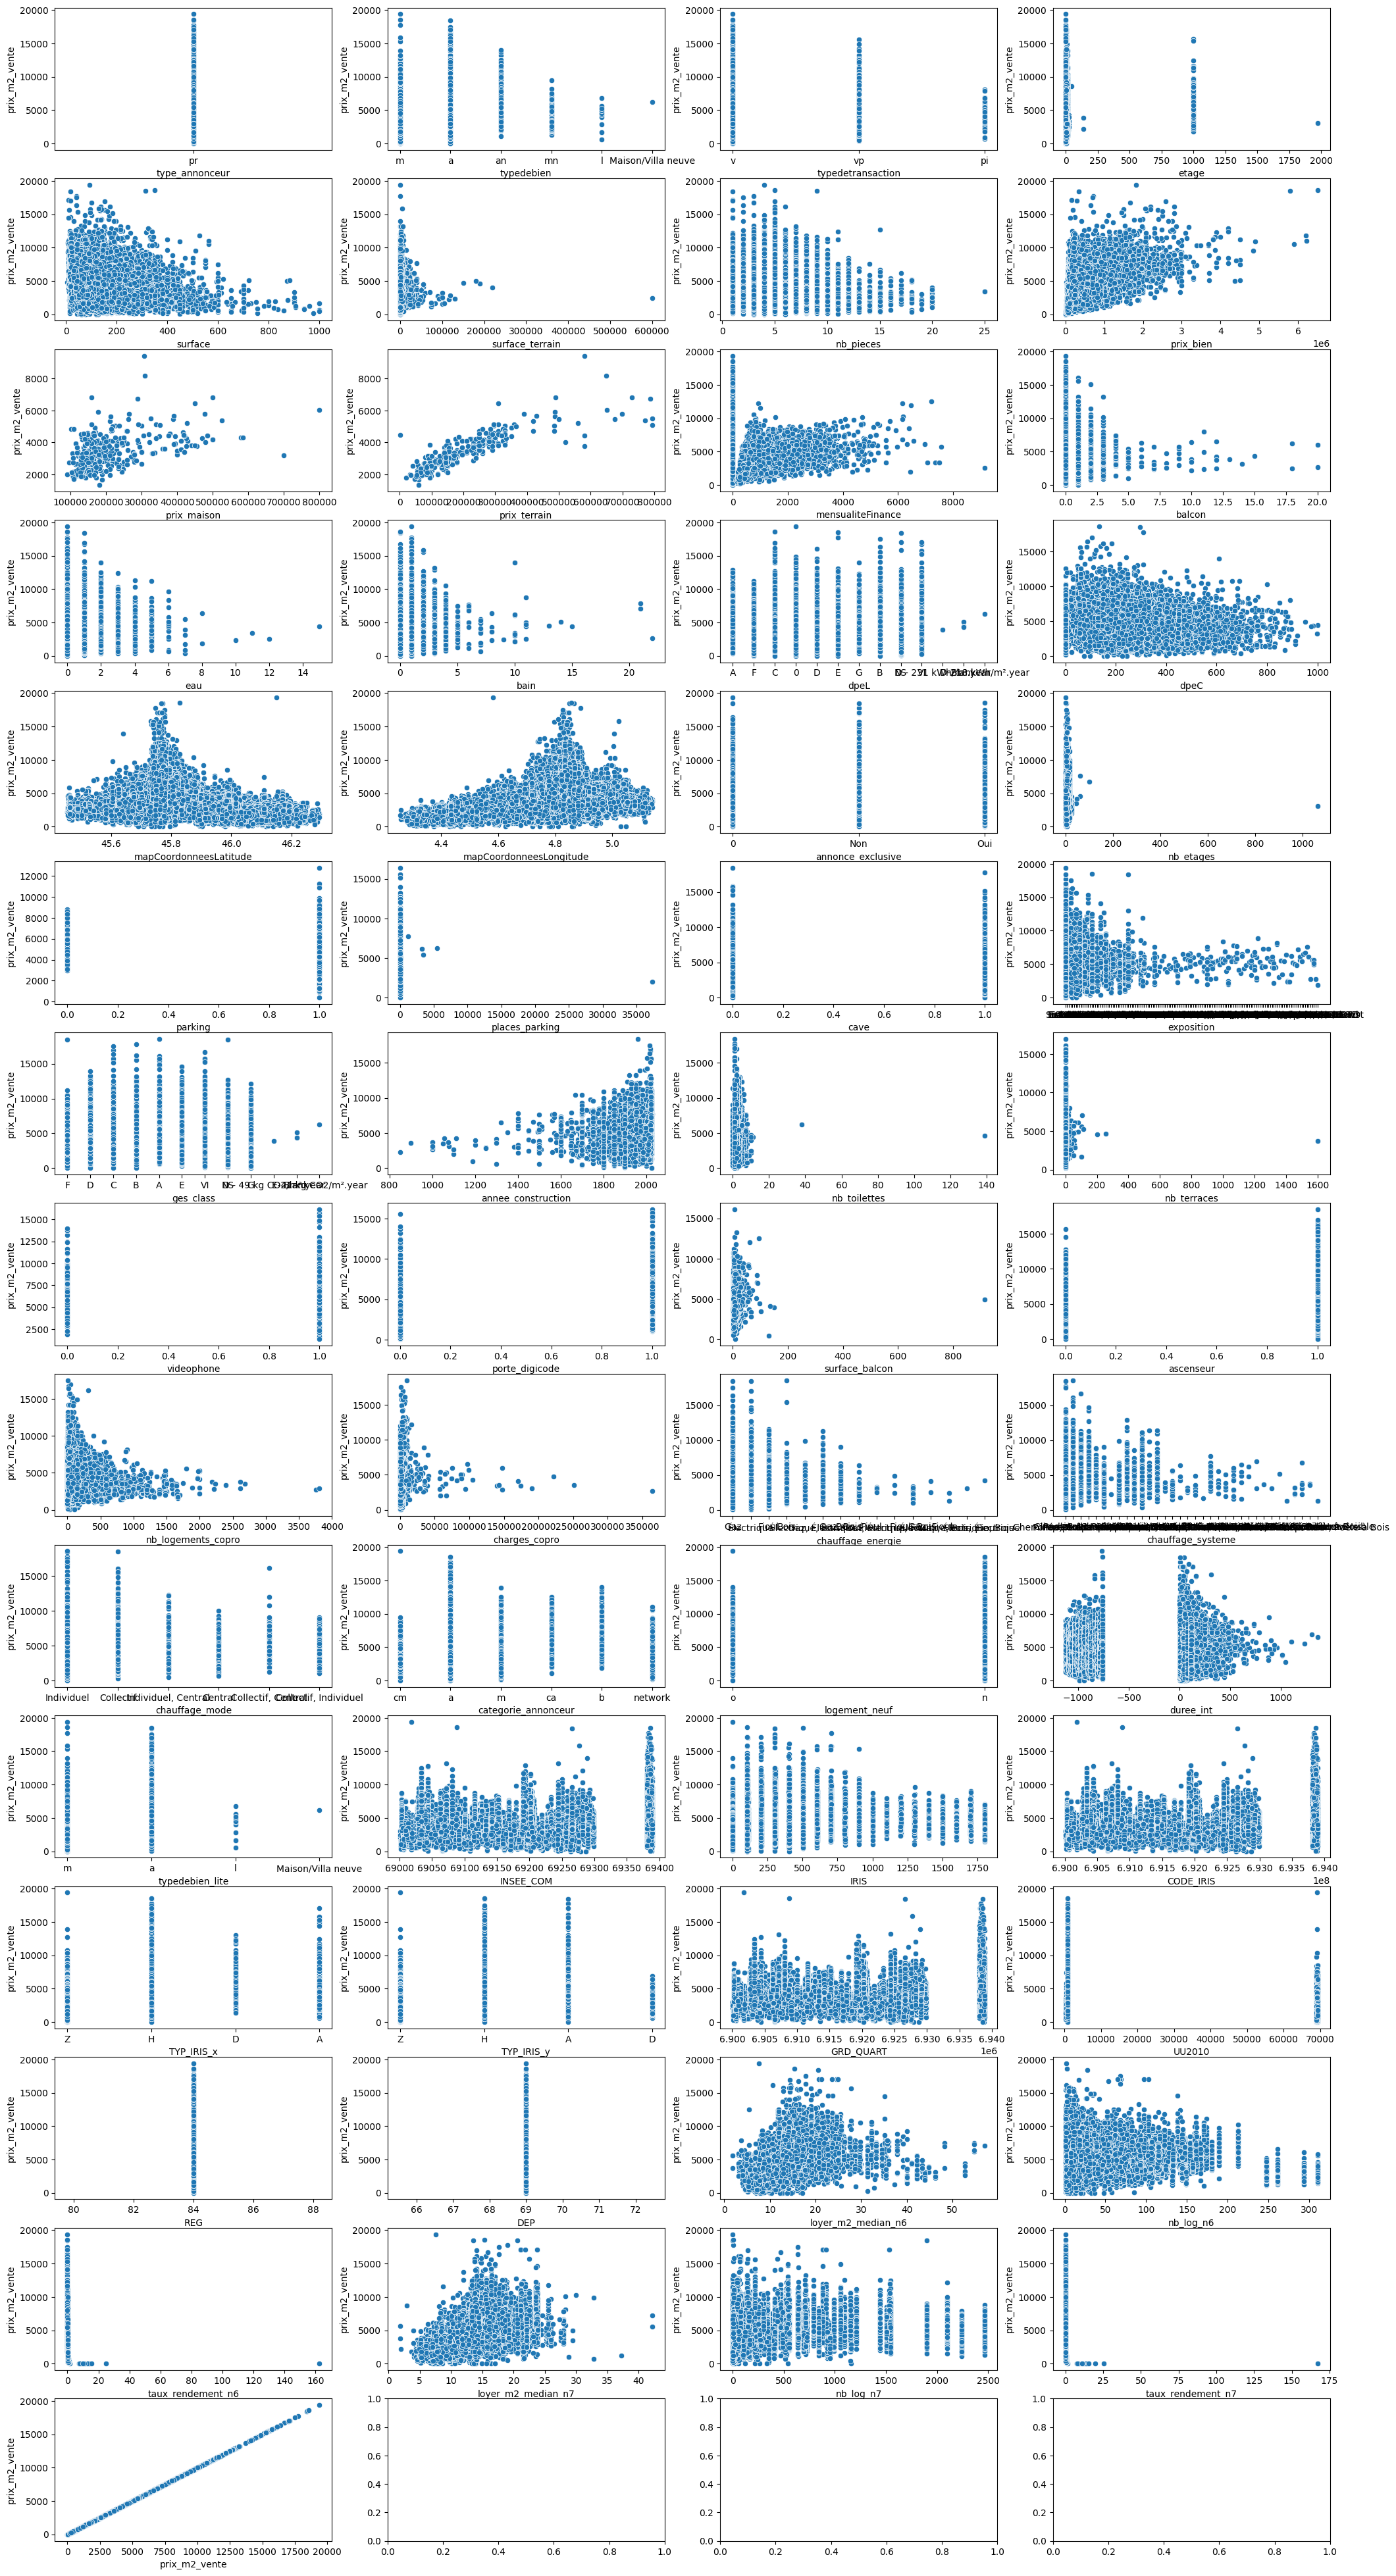

In [4]:

df.sort_values(by="prix_m2_vente",ascending=True)
columns = df.columns
print (type(columns))
nrows = int(columns.size/4) +1
fig , axes = plt.subplots(nrows = nrows, ncols = 4, figsize = (25,50))
index = 0
for column in columns :
    if column not in ["idannonce","date"] :
        sns.scatterplot(ax=axes[int(index/4),index%4],y=df["prix_m2_vente"],x=df[column])
        index = index +1

        

Index(['idannonce', 'type_annonceur', 'typedebien', 'typedetransaction',
       'etage', 'surface', 'surface_terrain', 'nb_pieces', 'prix_bien',
       'prix_maison', 'prix_terrain', 'mensualiteFinance', 'balcon', 'eau',
       'bain', 'dpeL', 'dpeC', 'mapCoordonneesLatitude',
       'mapCoordonneesLongitude', 'annonce_exclusive', 'nb_etages', 'parking',
       'places_parking', 'cave', 'exposition', 'ges_class',
       'annee_construction', 'nb_toilettes', 'nb_terraces', 'videophone',
       'porte_digicode', 'surface_balcon', 'ascenseur', 'nb_logements_copro',
       'charges_copro', 'chauffage_energie', 'chauffage_systeme',
       'chauffage_mode', 'categorie_annonceur', 'logement_neuf', 'duree_int',
       'typedebien_lite', 'date', 'INSEE_COM', 'IRIS', 'CODE_IRIS',
       'TYP_IRIS_x', 'TYP_IRIS_y', 'GRD_QUART', 'UU2010', 'REG', 'DEP',
       'loyer_m2_median_n6', 'nb_log_n6', 'taux_rendement_n6',
       'loyer_m2_median_n7', 'nb_log_n7', 'taux_rendement_n7', 'prix_m2_vente',
    

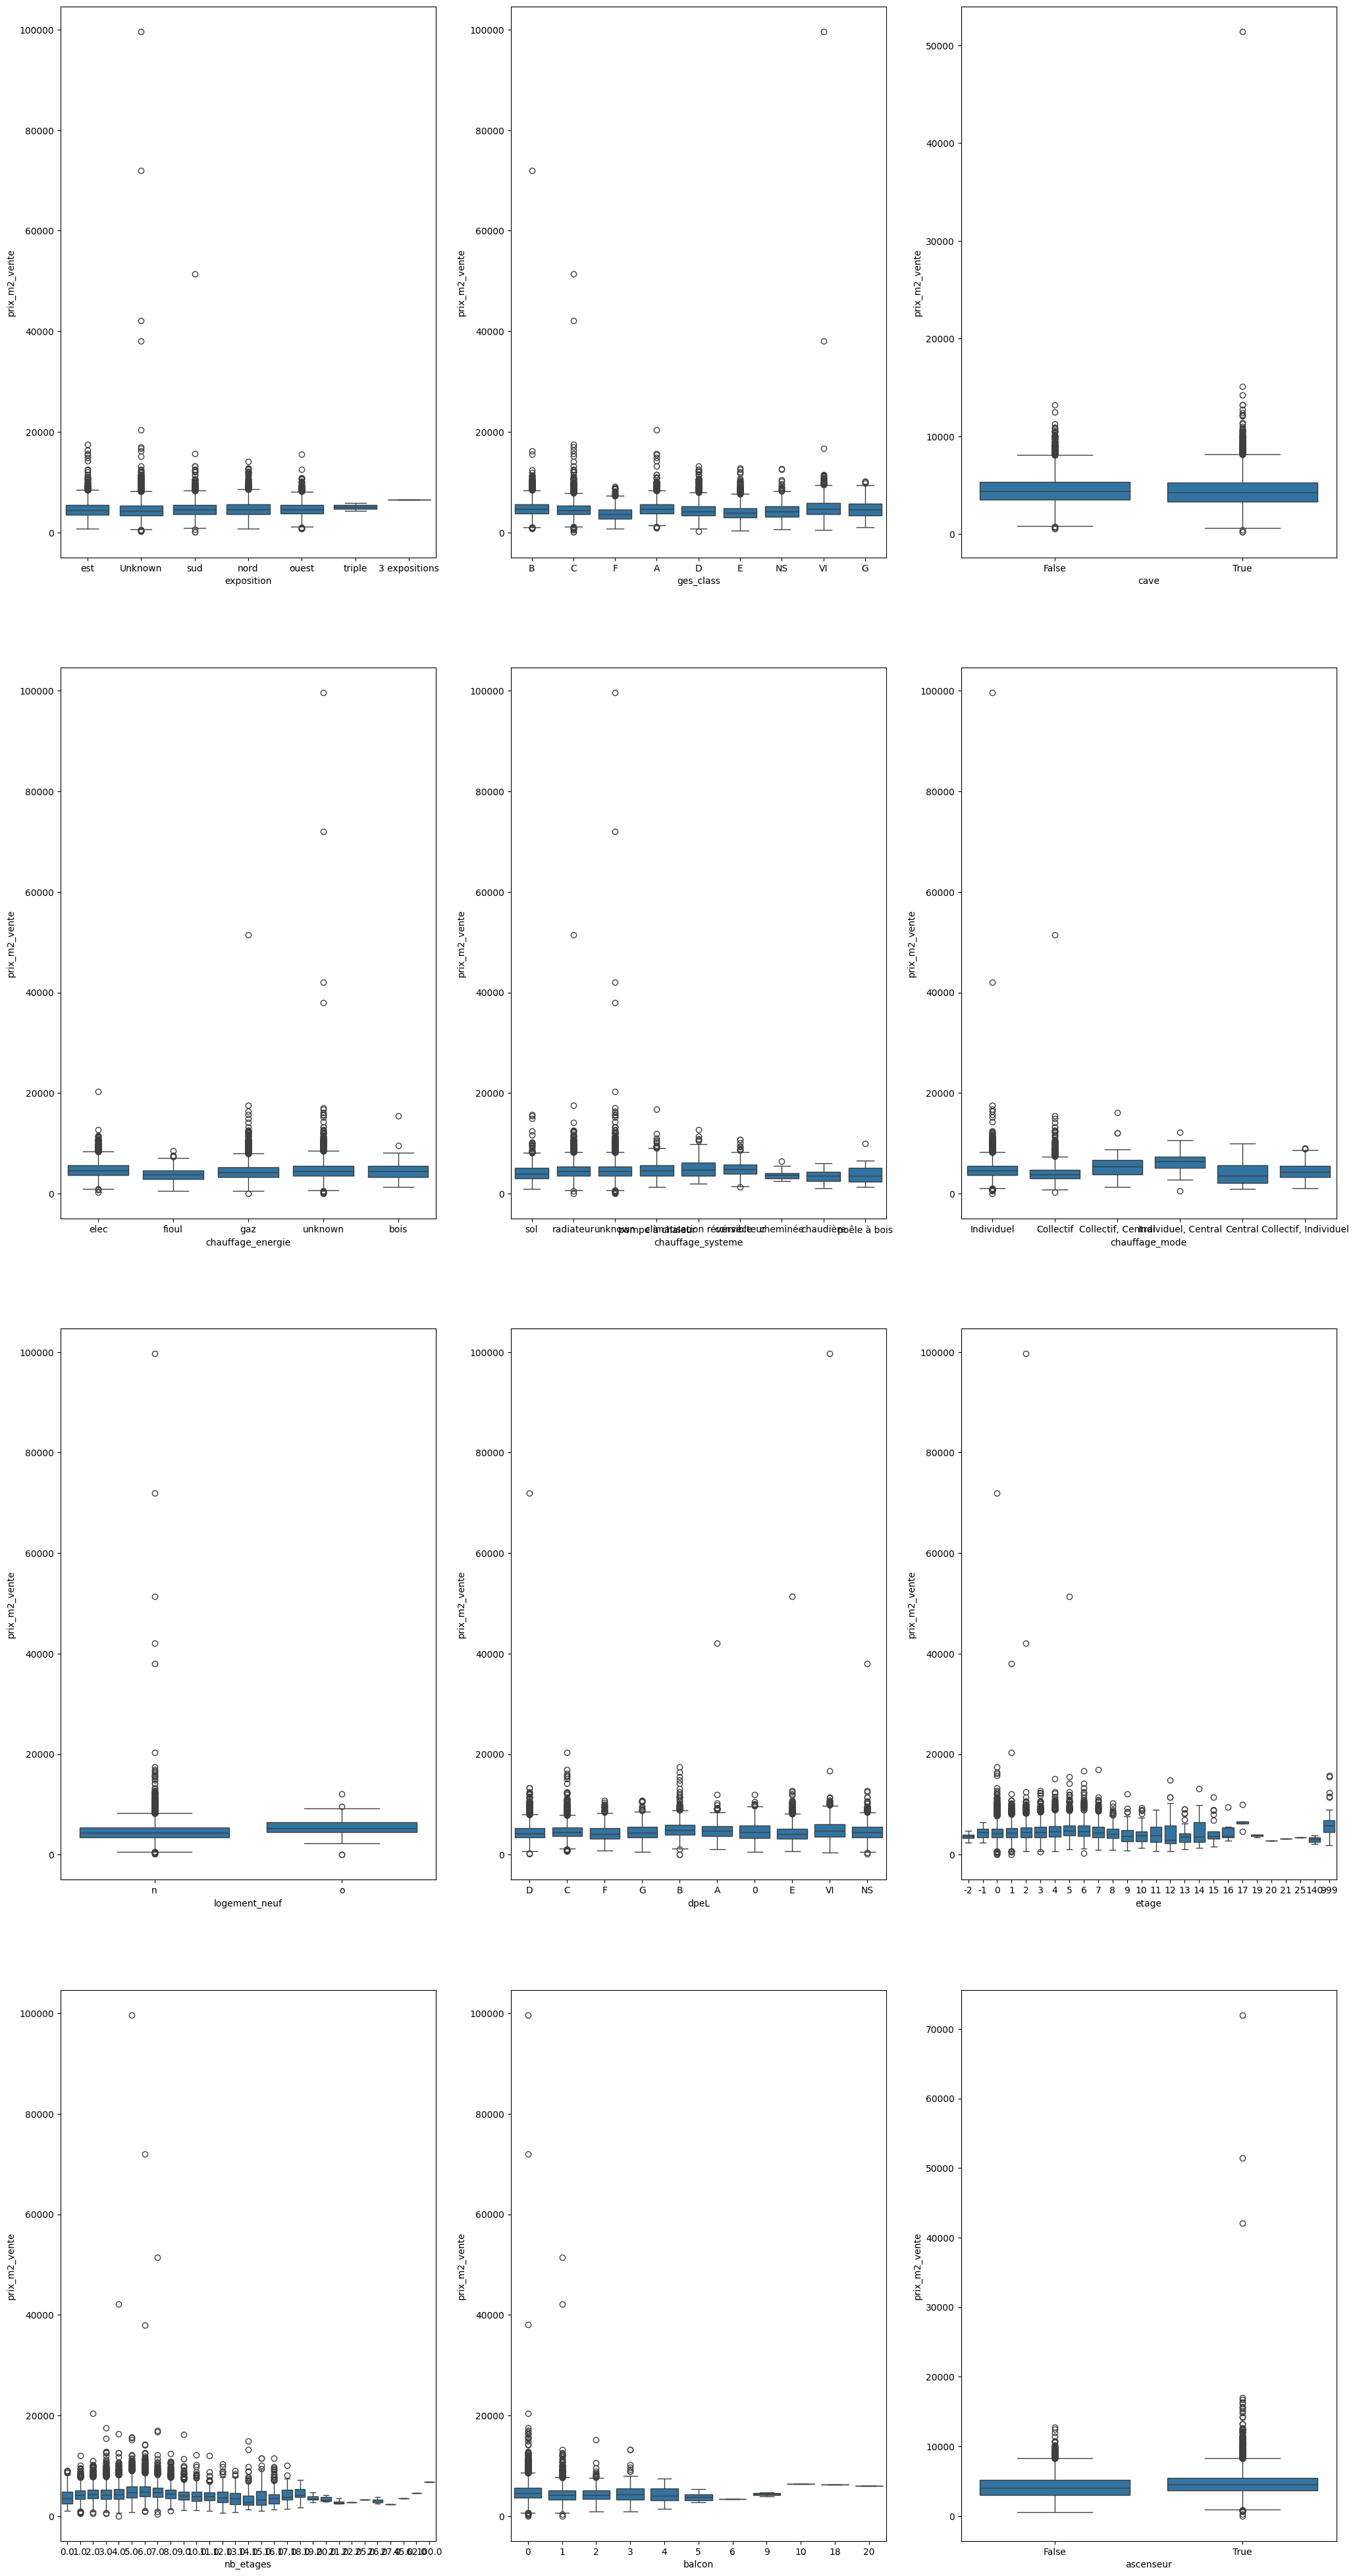

In [58]:
print (df.columns)

ncols=3
fig , axes = plt.subplots(nrows = 4, ncols = ncols, figsize = (25,50))
index = 0
columns = ["exposition","ges_class","cave",'chauffage_energie',
       'chauffage_systeme', 'chauffage_mode','logement_neuf','dpeL',"etage","nb_etages","balcon","ascenseur"]
for column in columns :
    sns.boxplot(ax=axes[int(index/ncols),index%ncols],y=df["prix_m2_vente"],x=df[column])
    index = index +1
